In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_excel("DATA_1.xlsx")
datayedek = data.copy() #datamın yedeğini de aldım.
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [15]:
#Buradan sonra kategorik değişkenleri modol de kullanmayacağım için data da atıcam

In [16]:
data = data.drop(["job","marital","education","contact","month"],axis =1)

In [17]:
data = data.drop("Unnamed: 0",axis =1)

In [18]:
data.head() #şimdi hazırız.

,age,default,balance,housing,loan,day,duration,campaign,y
0,58,0,2143,1,0,5,261,1,0
1,44,0,29,1,0,5,151,1,0
2,33,0,2,1,1,5,76,1,0
3,47,0,1506,1,0,5,92,1,0
4,33,0,1,0,0,5,198,1,0


In [22]:
y =data["y"].values
x = data.drop("y",axis =1).values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.33,random_state=15)
#rondom_state önemli değildir. eğer bir başkası bu modeli 15 ile oluşturursa aynı değerler dönürür.
#genel olarak %30 gibi bir değeri test için ayırırz.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [29]:
x_train=scaler.fit_transform(x_train)

In [31]:
x_test = scaler.transform(x_test)

In [33]:
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [36]:
x_train.shape

(26800, 8)

In [37]:
y_test.shape

(13200,)

In [60]:
model = Sequential()

model.add(Dense(units =8,activation="relu"))
model.add(Dense(units =5,activation="relu"))
model.add(Dense(units =5,activation="relu"))
model.add(Dense(units =5,activation="relu"))
model.add(Dense(units =5,activation="relu"))

model.add(Dense(1,activation="sigmoid")) #diğer modelde ise msekullanacağım.
model.compile(loss="binary_crossentropy",optimizer ="adam") #diğer modelde ise rmsprop kullanacağım.

In [40]:
model.fit(x=x_train,y=y_train,epochs =300,validation_data =(x_test,y_test),verbose =1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 26800 samples, validate on 13200 samples
Epoch 1/300
26800/26800 [==============================] - 4s 153us/sample - loss: 0.2944 - val_loss: 0.2354
Epoch 2/300
26800/26800 [==============================] - 5s 172us/sample - loss: 0.1960 - val_loss: 0.1831
Epoch 3/300
26800/26800 [==============================] - 4s 151us/sample - loss: 0.1808 - val_loss: 0.1806
Epoch 4/300
26800/26800 [==============================] - 2s 66us/sample - loss: 0.1801 - val_loss: 0.1821
Epoch 5/300
26800/26800 [==============================] - 3s 124us/sample - loss: 0.1795 - val_loss: 0.1774
Epoch 6/300
26800/26800 [==============================] - 3s 130us/sample - loss: 0.1792 - val_loss: 0.1790
Epoch 7/300
26800/26800 [==============================] - 4s 138us/sample - loss: 0.1787 - val_loss: 0.1765
Epoch 8/300
26800/26800 [==============================] - 4s 139us/sample - loss: 0.1788 - va

26800/26800 [==============================] - 2s 73us/sample - loss: 0.1736 - val_loss: 0.1736
Epoch 73/300
26800/26800 [==============================] - 3s 130us/sample - loss: 0.1735 - val_loss: 0.1717
Epoch 74/300
26800/26800 [==============================] - 3s 127us/sample - loss: 0.1733 - val_loss: 0.1745
Epoch 75/300
26800/26800 [==============================] - 3s 126us/sample - loss: 0.1738 - val_loss: 0.1752
Epoch 76/300
26800/26800 [==============================] - 3s 126us/sample - loss: 0.1732 - val_loss: 0.1718
Epoch 77/300
26800/26800 [==============================] - 3s 126us/sample - loss: 0.1735 - val_loss: 0.1789
Epoch 78/300
26800/26800 [==============================] - 3s 126us/sample - loss: 0.1734 - val_loss: 0.1740
Epoch 79/300
26800/26800 [==============================] - 3s 127us/sample - loss: 0.1738 - val_loss: 0.1721
Epoch 80/300
26800/26800 [==============================] - 3s 125us/sample - loss: 0.1729 - val_loss: 0.1722
Epoch 81/300
26800/26800

26800/26800 [==============================] - 3s 131us/sample - loss: 0.1721 - val_loss: 0.1716
Epoch 147/300
26800/26800 [==============================] - 3s 127us/sample - loss: 0.1720 - val_loss: 0.1729
Epoch 148/300
26800/26800 [==============================] - 3s 98us/sample - loss: 0.1721 - val_loss: 0.1707
Epoch 149/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1719 - val_loss: 0.1737
Epoch 150/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1721 - val_loss: 0.1723
Epoch 151/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1721 - val_loss: 0.1706
Epoch 152/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1719 - val_loss: 0.1733
Epoch 153/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1722 - val_loss: 0.1711
Epoch 154/300
26800/26800 [==============================] - 1s 47us/sample - loss: 0.1718 - val_loss: 0.1721
Epoch 155/300
26800/26

26800/26800 [==============================] - 3s 126us/sample - loss: 0.1708 - val_loss: 0.1708
Epoch 221/300
26800/26800 [==============================] - 2s 80us/sample - loss: 0.1701 - val_loss: 0.1717
Epoch 222/300
26800/26800 [==============================] - 2s 60us/sample - loss: 0.1703 - val_loss: 0.1694
Epoch 223/300
26800/26800 [==============================] - 3s 121us/sample - loss: 0.1708 - val_loss: 0.1708
Epoch 224/300
26800/26800 [==============================] - 3s 120us/sample - loss: 0.1704 - val_loss: 0.1718
Epoch 225/300
26800/26800 [==============================] - 3s 119us/sample - loss: 0.1703 - val_loss: 0.1733
Epoch 226/300
26800/26800 [==============================] - 3s 119us/sample - loss: 0.1702 - val_loss: 0.1704
Epoch 227/300
26800/26800 [==============================] - 3s 121us/sample - loss: 0.1703 - val_loss: 0.1703
Epoch 228/300
26800/26800 [==============================] - 3s 120us/sample - loss: 0.1700 - val_loss: 0.1698
Epoch 229/300
268

26800/26800 [==============================] - 3s 122us/sample - loss: 0.1689 - val_loss: 0.1699
Epoch 295/300
26800/26800 [==============================] - 3s 95us/sample - loss: 0.1694 - val_loss: 0.1703
Epoch 296/300
26800/26800 [==============================] - 3s 99us/sample - loss: 0.1695 - val_loss: 0.1704
Epoch 297/300
26800/26800 [==============================] - 3s 119us/sample - loss: 0.1693 - val_loss: 0.1705
Epoch 298/300
26800/26800 [==============================] - 3s 117us/sample - loss: 0.1688 - val_loss: 0.1712
Epoch 299/300
26800/26800 [==============================] - 3s 118us/sample - loss: 0.1695 - val_loss: 0.1698
Epoch 300/300
26800/26800 [==============================] - 2s 89us/sample - loss: 0.1689 - val_loss: 0.1710


In [45]:
verikaybi = pd.DataFrame(model.history.history)

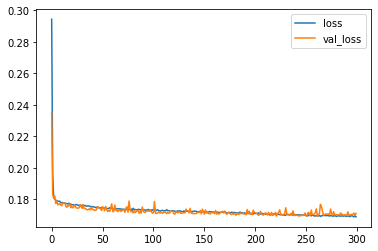

In [46]:
verikaybi.plot()

OLDUKÇA BAŞARILI BİR SONUÇ OLARAK GÖZÜKÜYOR.ŞİMDİ TAHMİNLERE BAKALIM

In [47]:
tahminlerimiz = model.predict_classes(x_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
#confusion_matrix sınflandırmamızn ne kdar düzgün sonuç verdiğini gösterir
#classification_report da genel bir rapor içerir

In [58]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12235
           1       0.57      0.26      0.36       965

    accuracy                           0.93     13200
   macro avg       0.76      0.62      0.66     13200
weighted avg       0.92      0.93      0.92     13200



Burada öellikle precision bakarım ki modelimiz 0 ları %94 1 leri ise %57 doğru tahmin ediyor.
0 lar vadeli mevduat geçmeyenleri,
1 ise vadeli mevduata geçenleri temsil etmektedir.

In [59]:
print(confusion_matrix(y_test,tahminlerimiz))

[[12046   189]
 [  713   252]]


Burada ise 189 tahmini yanlış bulduğunu, diğerleini dogru bulduğunu görebiliriz.
Modelimiz eğer istendiği gibi peformans göstermezse model içerisnde bir çok noktada değişiklikler yapabiliriz.

In [62]:
model.save("model_1.h5")